In [31]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression .ipynb file
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [32]:
x = sp.Symbol('x')
y = 0.8 * x + 0.6
print("y = ", end='')
sp.pprint(y)


y = 0.8⋅x + 0.6


In [33]:
def ModelEquation(input):
    return 0.8*input+0.6

In [34]:
total_data_points = 50000
x = np.linspace(0, 2, total_data_points)
y = ModelEquation(x)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [35]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = ensure_column_vector(np.array(x[:training_numbers]))
training_labels = np.array(y[:training_numbers])

testing_attributes=ensure_column_vector(np.array(x[training_numbers:]))
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 1)
(7500, 1)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.54027693]]  bias  0.00017198344185583982 loss 0.7619642030021919
Iteration  1000  weights  [[0.69266531]]  bias  0.14070425260306146 loss 0.32518435716814
Iteration  2000  weights  [[0.78936181]]  bias  0.23371111518503856 loss 0.1422266866869033
Iteration  3000  weights  [[0.85010814]]  bias  0.2959278188789589 loss 0.06538212485507225
Iteration  4000  weights  [[0.88766575]]  bias  0.3381757244022389 loss 0.032911621005183515
Iteration  5000  weights  [[0.91028338]]  bias  0.36745277989338926 loss 0.019008916868773238
Iteration  6000  weights  [[0.92329231]]  bias  0.388285023555015 loss 0.012886586954463708
Iteration  7000  weights  [[0.93013774]]  bias  0.4036003377607971 loss 0.010034669546572006
Iteration  8000  weights  [[0.93304554]]  bias  0.41529333658426415 loss 0.008567050462983181
Iteration  9000  weights  [[0.93345333]]  bias  0.4245905696783254 loss 0.007694364551971199
Iteration  10000  weights  [[0.93228915]]  bias  0.4322866297501216 loss 0.

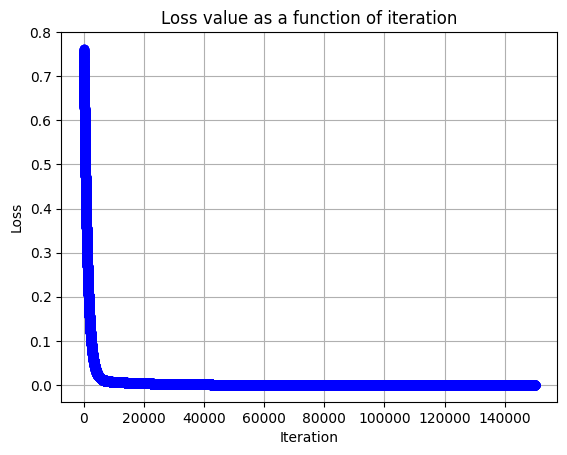

In [ ]:
model = LinearRegression(training_features, training_labels , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [37]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes),model.predict(testing_attributes)))

Predicted weights  [[0.80191323]]  bias  0.5977416582949311
Prediction loss 1.343265798450169e-06
